Importing the necessary modules:

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Load dataset from Keras' library:

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

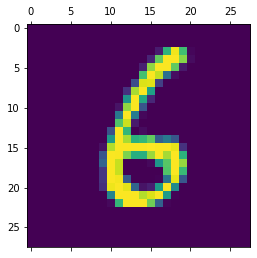

In [11]:
plt.matshow(X_train[6548])

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

Create neural network model:

In [26]:
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(784,), 
                                             activation='sigmoid')
])

In [27]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4743 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3042 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9254


In [29]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9238


[0.272316575050354, 0.923799991607666]

Confusion matrix:

In [30]:
y_predicted = model.predict(X_test_flat)

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Actual')

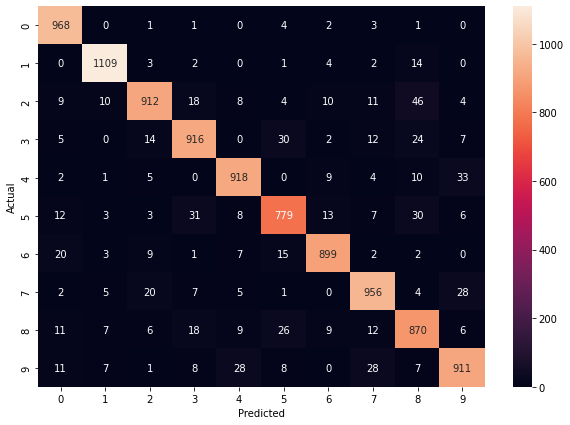

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Add 2 hidden layers:

In [43]:
model = keras.Sequential([
                          keras.layers.Dense(196, input_shape=(784,), activation='relu'),
                          keras.layers.Dense(49, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [44]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2281 - accuracy: 0.9330
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9875


In [45]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9803


[0.06896507740020752, 0.9803000092506409]

Text(69.0, 0.5, 'Actual')

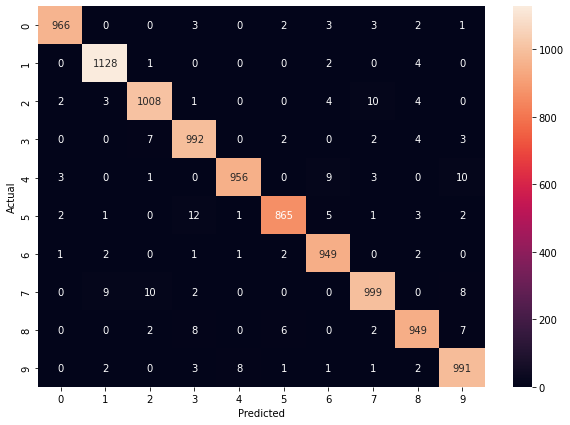

In [46]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')